In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import graphviz
import pydotplus
from PIL import Image
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [29]:
Medic = pd.read_csv('drugs.csv')
Medic

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [30]:
feature_cols = ['Age','Sex','BP','Cholesterol','Na_to_K']
X = Medic[feature_cols].values
y = Medic['Drug']

In [31]:
y.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [32]:
# Preprocesando los datos

Pre_sex = preprocessing.LabelEncoder()
Pre_sex.fit(['F','M'])
X[:,1] = Pre_sex.transform(X[:,1])

Pre_BP = preprocessing.LabelEncoder()
Pre_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = Pre_BP.transform(X[:,2])

Pre_Chol = preprocessing.LabelEncoder()
Pre_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = Pre_Chol.transform(X[:,3])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [35]:
print('F1Score de prueba.. ',rf.score(X_test, y_test))
print('F1Score de entrenamiento.. ',rf.score(X_train, y_train))

F1Score de prueba..  1.0
F1Score de entrenamiento..  1.0


In [36]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [37]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,5))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), feature_cols) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

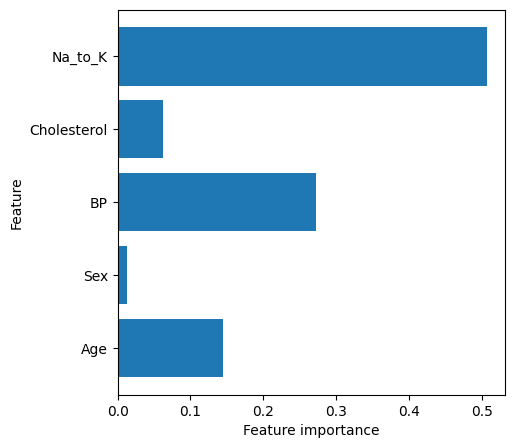

In [38]:
plot_feature_importances(rf)

## Gradient Boosting Tree

In [40]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [41]:
print('F1Score de prueba.. ',gbt.score(X_test, y_test))
print('F1Score de entrenamiento.. ',gbt.score(X_train, y_train))

F1Score de prueba..  1.0
F1Score de entrenamiento..  1.0


In [42]:
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



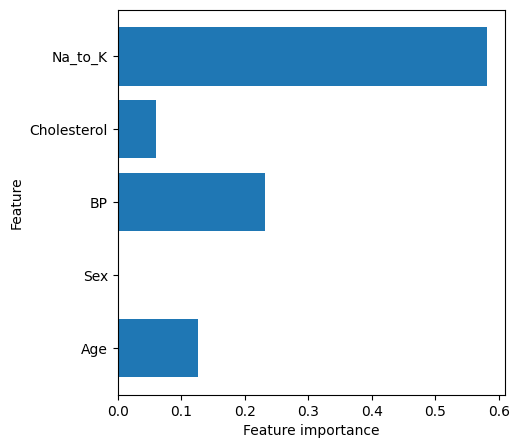

In [43]:
plot_feature_importances(gbt)